# DS 203 Project
## Potentially Hazardous Asteroid Detection
_________

### I) EDA

In [ ]:
!pip install seaborn==0.11.0
#need not do this locally if you have this version installed
#add a header text file saying ds203 project pha thing eda part

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("final.csv")
display(df)

,Unnamed: 0,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,ma,class,data_arc,condition_code,rms
0,0,2000433,11.160,4.412295,54688084.0,611,0.0,0.150505,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880,0.0,25.208245,0.250,5.270,271.071733,AMO,46330.0,0.0,0.28397
1,1,2000719,15.500,NaN,NaN,214,NaN,0.203482,3.140,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,0.229955,0.0,NaN,NaN,5.801,140.273422,AMO,39593.0,0.0,0.39148
2,2,2000887,13.800,NaN,NaN,311,NaN,0.082217,3.221,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,0.253323,0.0,4.200000,0.310,73.970,294.579167,AMO,37558.0,0.0,0.44039
3,3,2001036,9.400,NaN,NaN,823,NaN,0.344956,3.035,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,0.226582,0.0,37.675000,0.238,10.297,4.817744,AMO,35105.0,0.0,0.38018
4,4,2001221,17.700,NaN,NaN,104,NaN,0.107450,3.781,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,0.370615,0.0,1.000000,NaN,NaN,38.522411,AMO,32328.0,0.0,0.45839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,24631,54097467,21.000,NaN,NaN,2,NaN,0.192704,2.924,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,0.240741,0.0,NaN,NaN,NaN,351.405894,AMO,7.0,9.0,0.23911
24632,24632,54097667,23.463,NaN,NaN,1,NaN,0.045436,3.907,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,0.421568,0.0,NaN,NaN,NaN,356.724840,AMO,10.0,8.0,0.45779
24633,24633,54097668,25.282,NaN,NaN,1,NaN,0.005352,3.141,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,0.247466,0.0,NaN,NaN,NaN,5.162592,APO,1.0,8.0,0.43094
24634,24634,54097669,21.967,NaN,NaN,1,NaN,0.018582,4.201,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,0.475470,1.0,NaN,NaN,NaN,344.370686,APO,3.0,9.0,0.26581


In [ ]:
print('df number of records = '+str(df.shape[0]))
print('df number of variables = '+str(df.shape[1]))
df_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df.columns.values:
    list_vals = pd.unique(df[col])
    df_stats = df_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) < 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are:' +list_str[0:len(list_str)-2])
display(df_stats)    
print(" ")
print("The number of columns with no missing entries are",no_missing_entries)  

df number of records = 24636
df number of variables = 26
The only enteries in the field pha are:0.0, 1.0, nan
The only enteries in the field class are:AMO, APO, ATE, IEO, nan


,Field_name,Type,No_unique_vals,No_null_enteries
0,Unnamed: 0,int64,24636,0
1,Neo Reference ID,int64,24636,0
2,Absolute Magnitude,float64,2717,10
3,Relative Velocity km per sec,float64,3693,20944
4,Miss Dist.(kilometers),float64,3676,20944
5,orbit_id,int64,330,0
6,Orbit Uncertainity,float64,11,20944
7,Minimum Orbit Intersection,float64,24381,1
8,Jupiter Tisserand Invariant,float64,4532,0
9,Eccentricity,float64,24629,0


 
The number of columns with no missing entries are 12


In [ ]:
df = df.drop("Unnamed: 0",axis = 1)  
dfk = df.fillna(-1)

In [ ]:
dfk

,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,ma,class,data_arc,condition_code,rms
0,2000433,11.160,4.412295,54688084.0,611,0.0,0.150505,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880,0.0,25.208245,0.250,5.270,271.071733,AMO,46330.0,0.0,0.28397
1,2000719,15.500,-1.000000,-1.0,214,-1.0,0.203482,3.140,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,0.229955,0.0,-1.000000,-1.000,5.801,140.273422,AMO,39593.0,0.0,0.39148
2,2000887,13.800,-1.000000,-1.0,311,-1.0,0.082217,3.221,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,0.253323,0.0,4.200000,0.310,73.970,294.579167,AMO,37558.0,0.0,0.44039
3,2001036,9.400,-1.000000,-1.0,823,-1.0,0.344956,3.035,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,0.226582,0.0,37.675000,0.238,10.297,4.817744,AMO,35105.0,0.0,0.38018
4,2001221,17.700,-1.000000,-1.0,104,-1.0,0.107450,3.781,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,0.370615,0.0,1.000000,-1.000,-1.000,38.522411,AMO,32328.0,0.0,0.45839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,54097467,21.000,-1.000000,-1.0,2,-1.0,0.192704,2.924,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,0.240741,0.0,-1.000000,-1.000,-1.000,351.405894,AMO,7.0,9.0,0.23911
24632,54097667,23.463,-1.000000,-1.0,1,-1.0,0.045436,3.907,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,0.421568,0.0,-1.000000,-1.000,-1.000,356.724840,AMO,10.0,8.0,0.45779
24633,54097668,25.282,-1.000000,-1.0,1,-1.0,0.005352,3.141,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,0.247466,0.0,-1.000000,-1.000,-1.000,5.162592,APO,1.0,8.0,0.43094
24634,54097669,21.967,-1.000000,-1.0,1,-1.0,0.018582,4.201,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,0.475470,1.0,-1.000000,-1.000,-1.000,344.370686,APO,3.0,9.0,0.26581


In [ ]:
categorical_cols = ["orbit_id","class"]
df_categorical_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries','mode'])
for col in categorical_cols:
    list_vals = pd.unique(df[col].dropna())   
    df_categorical_stats = df_categorical_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))),"mode":df[col].mode()[0] }, ignore_index=True)
display(df_categorical_stats)



,Field_name,Type,No_unique_vals,No_null_enteries,mode
0,orbit_id,int64,330,0,4
1,class,object,4,220,APO


In [ ]:
float_cols = []
for col in df.columns.values:   
    if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
      float_cols.append(col)
float_cols.remove("Neo Reference ID")
df_continuous_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries',
                                              'mean',"median","skew","min","max","25th-percentile",
                                               "75th-percentile","inter quartile range"])
def skew(col):
  if np.mean(df[col].dropna())<np.median(df[col].dropna()):
    return "Left"
  elif np.mean(df[col].dropna())>np.median(df[col].dropna()):
    return "Right"
  else :
    return "No skew"  
for col in float_cols:
   list_vals = pd.unique(df[col].dropna()) 
   df_continuous_stats = df_continuous_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))),"mean":np.mean(df[col].dropna()),
                                "median":np.median(df[col].dropna()),"skew":skew(col),
                                "min":np.min(df[col].dropna()),"max":np.max(df[col].dropna()),
                                "25th-percentile":np.quantile(df[col].dropna(),0.25),
                                "75th-percentile":np.quantile(df[col].dropna(),0.75),
                                "inter quartile range":np.quantile(df[col].dropna(),0.75)-np.quantile(df[col].dropna(),0.25)},
                                 ignore_index=True)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
display(df_continuous_stats)



,Field_name,Type,No_unique_vals,No_null_enteries,mean,median,skew,min,max,25th-percentile,75th-percentile,inter quartile range
0,Absolute Magnitude,float64,2716,10,22.93123,23.16950,Left,9.40000,33.20000,20.60000,25.20000,4.60000
1,Relative Velocity km per sec,float64,3692,20944,13.94835,12.81399,Right,0.33550,44.24469,8.31080,18.04763,9.73684
2,Miss Dist.(kilometers),float64,3675,20944,37784317.98626,38651850.00000,Left,26609.88672,74781600.00000,18385234.50000,57389857.00000,39004622.50000
3,orbit_id,int64,330,0,20.25154,9.00000,Right,1.00000,8629.00000,5.00000,20.00000,15.00000
4,Orbit Uncertainity,float64,10,20944,3.69691,4.00000,Left,0.00000,9.00000,0.00000,7.00000,7.00000
5,Minimum Orbit Intersection,float64,24380,1,0.09300,0.05257,Right,0.00000,0.70772,0.01551,0.14218,0.12667
6,Jupiter Tisserand Invariant,float64,4532,0,4.25322,4.01200,Right,-1.20500,9.98700,3.42400,4.87925,1.45525
7,Eccentricity,float64,24629,0,0.44254,0.45612,Left,0.00285,0.99648,0.31189,0.56838,0.25649
8,Inclination,float64,24629,0,12.50624,8.82124,Right,0.01451,165.54089,4.57860,17.72210,13.14350
9,Asc Node Longitude,float64,24630,0,172.89218,173.09038,Left,0.00194,359.97659,82.19231,254.05792,171.86561


### Classification of columns:-
1. **Discrete:**
    * **Categorical:** Neo Reference ID, orbit_id, pha, class.
    * **Ordinal:** Orbit Uncertainity, condition_code. 
    * **Quantised Numerical:** data_arc.
2. **Continous:**
    * **Numerical:** Absolute Magnitude, **--Avg diameter--**, Relative Velocity km per sec, Miss Dist.(kilometers), Minimum Orbit Intersection, Jupiter Tisserand Invariant, Eccentricity, Semi Major Axis, Inclination, Asc Node Longitude, Orbital Period, Perihelion Distance, Perihelion Arg, Aphelion Dist, Mean Motion, albedo, rot_per, ma, rms.

In [ ]:
np.max(df['Perihelion Distance'])

1.299987824

#### HeatMap

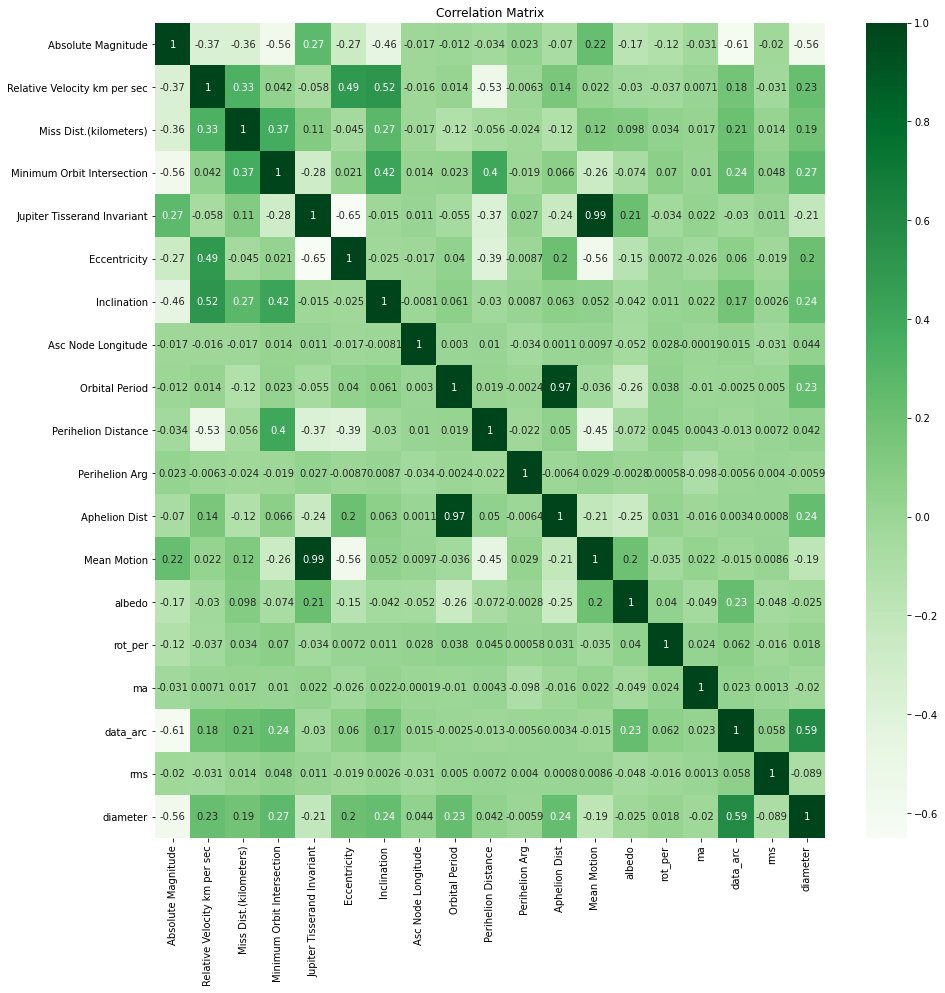

In [ ]:
cont_cols = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Minimum Orbit Intersection',
             'Jupiter Tisserand Invariant', 'Eccentricity', 'Inclination', 'Asc Node Longitude',
             'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Mean Motion', 'albedo',
             'rot_per', 'ma', 'data_arc', 'rms', "diameter"] 

plt.figure(figsize=(15,15))

sns.heatmap(df[cont_cols].corr(), annot=True , cmap= 'Greens')   #setting up the heat map
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#df = df.drop("Jupiter Tisserand Invariant",axis = 1)  #highly correlated(>0.95) with another field
#df = df.drop("Orbital Period",axis = 1)  #highly correlated(>0.95) with another field  

#### BarPlots

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


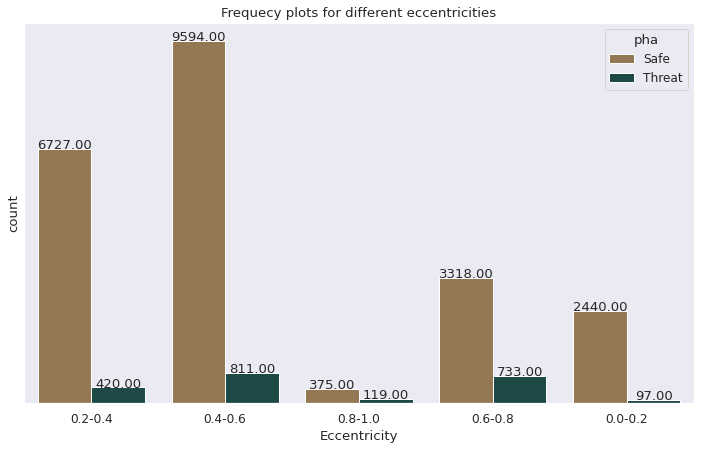

In [ ]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.1)
per_groups = df['Perihelion Distance']*4//1
ecc_groups = df['Eccentricity']*5//1
per_groups = per_groups.replace({0:'0.0-0.25', 1:'0.25-0.5', 2:'0.5-0.75', 3:'0.75-1', 4:'1-1.25', 5:'1.25+'})
ecc_groups = ecc_groups.replace({0:'0.0-0.2', 1:'0.2-0.4', 2:'0.4-0.6', 3:'0.6-0.8', 4:'0.8-1.0'})
ax = sns.countplot(ecc_groups, hue=df['pha'].replace({0:'Safe', 1:'Threat'}),palette=sns.color_palette('cubehelix_r', n_colors=3)[1:])
for p in ax.patches:                                        
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 5,'{:1.2f}'.format(height), ha="center")
plt.title('Frequecy plots for different eccentricities')
plt.yticks([])
plt.show()

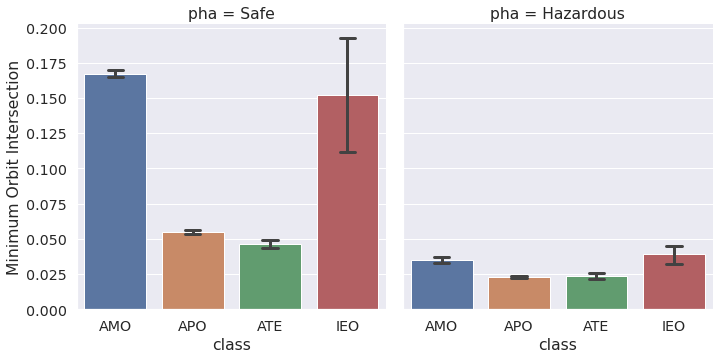

In [ ]:
temp = df.copy()
temp['pha'] = df['pha'].replace({0:'Safe', 1:'Hazardous'})
temp['Eccentricity(e)'] = ecc_groups
temp['Perihelion Dist.'] = per_groups
sns.catplot(data=temp, x='class', y='Minimum Orbit Intersection',
            col='pha', saturation=.7,kind="bar", ci=95, aspect=1,capsize=.2,errwidth=3)
plt.show()

In [ ]:
temp

,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,ma,class,data_arc,condition_code,rms,Eccentricity(e),Perihelion Dist.
0,2000433,11.16000,4.41230,54688084.00000,611,0.00000,0.15050,4.58300,0.22259,10.82759,304.32216,642.99547,1.13342,178.81659,1.78246,0.55988,Safe,25.20825,0.25000,5.27000,271.07173,AMO,46330.00000,0.00000,0.28397,0.2-0.4,1-1.25
1,2000719,15.50000,nan,nan,214,nan,0.20348,3.14000,0.54656,11.56748,183.86695,1565.52236,1.19645,156.17634,4.08075,0.22996,Safe,nan,nan,5.80100,140.27342,AMO,39593.00000,0.00000,0.39148,0.4-0.6,1-1.25
2,2000887,13.80000,nan,nan,311,nan,0.08222,3.22100,0.57033,9.39385,110.43425,1421.11327,1.06289,350.49555,3.88459,0.25332,Safe,4.20000,0.31000,73.97000,294.57917,AMO,37558.00000,0.00000,0.44039,0.4-0.6,1-1.25
3,2001036,9.40000,nan,nan,823,nan,0.34496,3.03500,0.53305,26.67764,215.54683,1588.82816,1.24430,132.36463,4.08515,0.22658,Safe,37.67500,0.23800,10.29700,4.81774,AMO,35105.00000,0.00000,0.38018,0.4-0.6,1-1.25
4,2001221,17.70000,nan,nan,104,nan,0.10745,3.78100,0.43528,11.87654,171.32701,971.35946,1.08397,26.69479,2.75503,0.37061,Safe,1.00000,nan,nan,38.52241,AMO,32328.00000,0.00000,0.45839,0.4-0.6,1-1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,54097467,21.00000,nan,nan,2,nan,0.19270,2.92400,0.54640,40.71900,84.64713,1495.38386,1.16086,17.03448,3.95752,0.24074,Safe,nan,nan,nan,351.40589,AMO,7.00000,9.00000,0.23911,0.4-0.6,1-1.25
24632,54097667,23.46300,nan,nan,1,nan,0.04544,3.90700,0.41797,25.60301,63.79419,853.95537,1.02526,12.69698,2.49781,0.42157,Safe,nan,nan,nan,356.72484,AMO,10.00000,8.00000,0.45779,0.4-0.6,1-1.25
24633,54097668,25.28200,nan,nan,1,nan,0.00535,3.14100,0.62103,10.87361,250.14867,1454.74655,0.95220,153.11844,4.07303,0.24747,Safe,nan,nan,nan,5.16259,APO,1.00000,8.00000,0.43094,0.6-0.8,0.75-1
24634,54097669,21.96700,nan,nan,1,nan,0.01858,4.20100,0.40000,12.60011,129.45567,757.14556,0.97546,333.35740,2.27604,0.47547,Hazardous,nan,nan,nan,344.37069,APO,3.00000,9.00000,0.26581,0.2-0.4,0.75-1


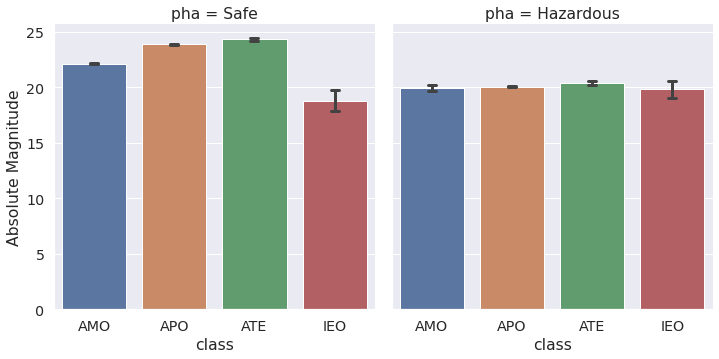

In [ ]:
sns.catplot(data=temp, x='class', y='Absolute Magnitude',
            col='pha', saturation=.7,kind="bar", ci=95, aspect=1,capsize=.1,errwidth=3)
plt.show()

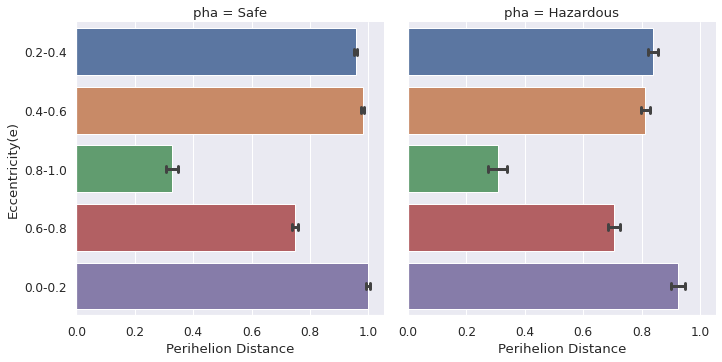

In [ ]:
sns.catplot(data=temp, y='Eccentricity(e)', x='Perihelion Distance',
            col='pha', saturation=.7,kind="bar", ci=99, aspect=1, orient='h',capsize=.1,errwidth=3)
plt.show()

#### Box and Whiskers plots

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


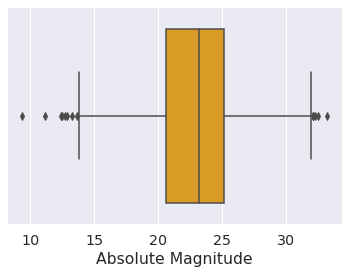

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


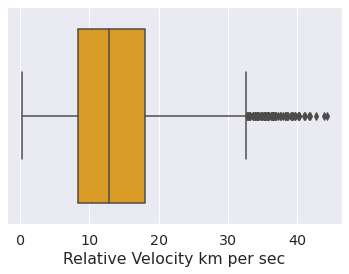

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


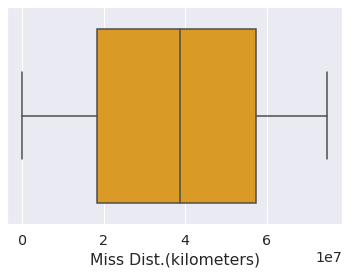

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


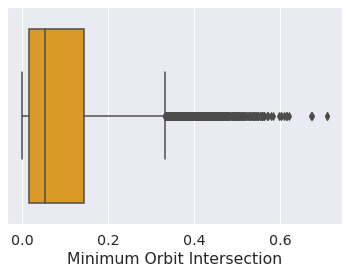

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


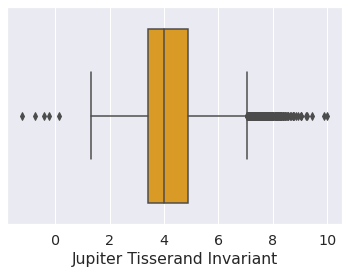

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


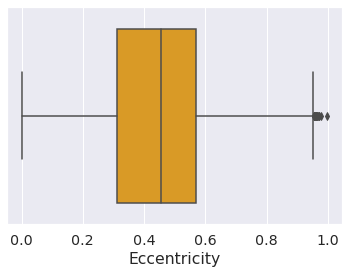

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


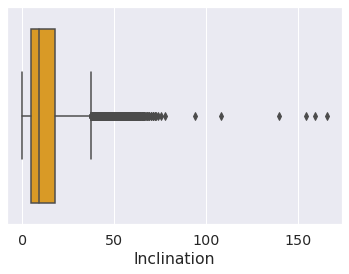

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


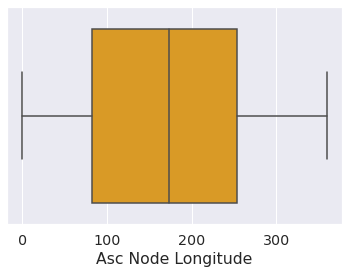

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


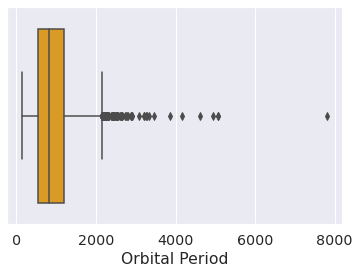

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


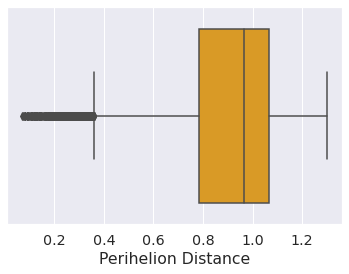

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


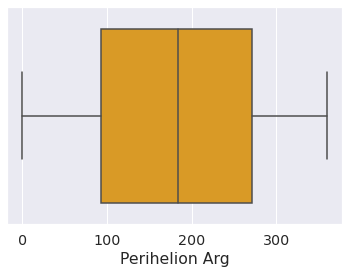

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


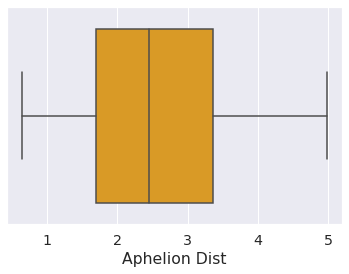

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


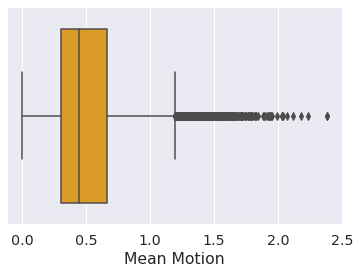

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


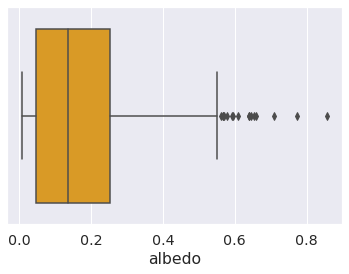

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


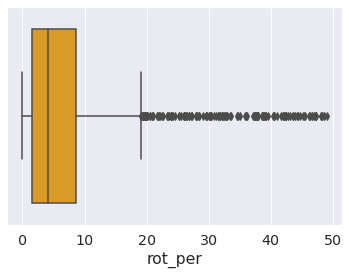

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


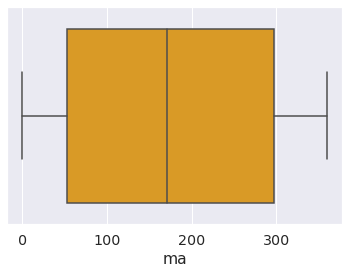

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


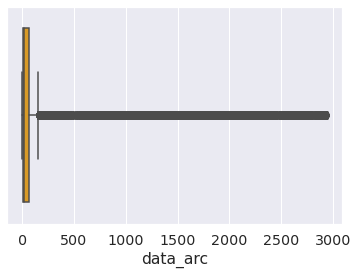

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


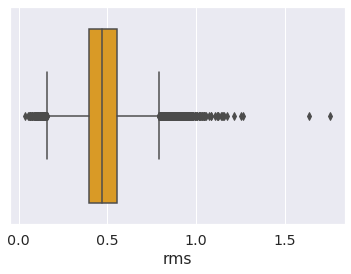

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


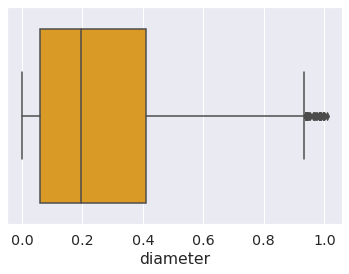

In [ ]:
sns.set(font_scale=1.3)
for col in cont_cols:
    series = df[col].dropna()
    if col in ['Orbital Period', 'rot_per', 'data_arc', 'diameter', 'data_arc', 'Aphelion Dist']:
        # columns with a few large outliers
        m = np.mean(series)
        s = np.std(series)
        series = series.where(series < m + 0.5*s)
    sns.boxplot(series, color='orange', saturation=0.7)
    plt.show()

#### Violin Plots

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


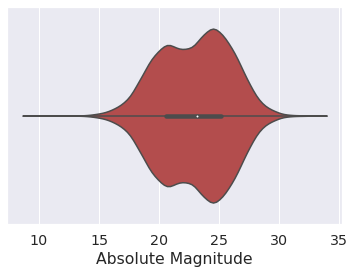

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


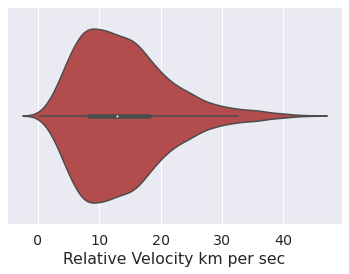

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


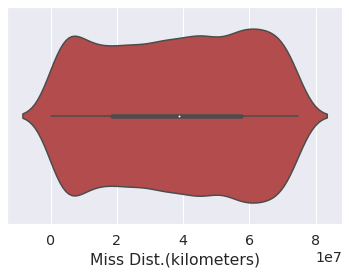

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


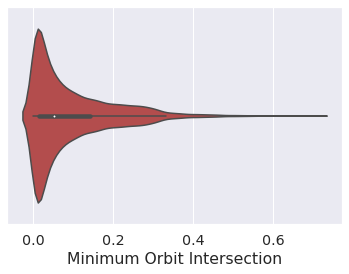

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


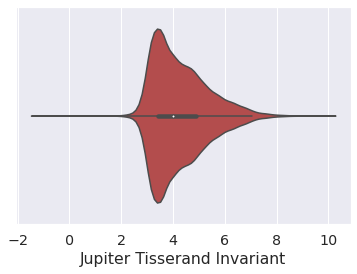

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


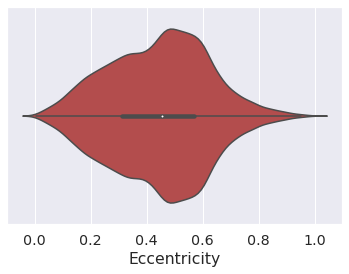

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


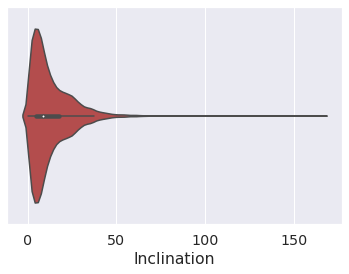

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


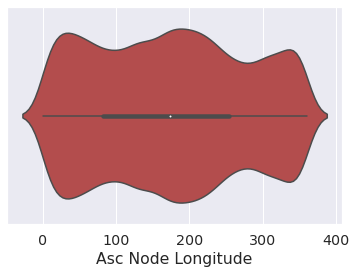

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


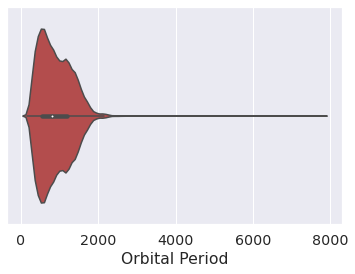

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


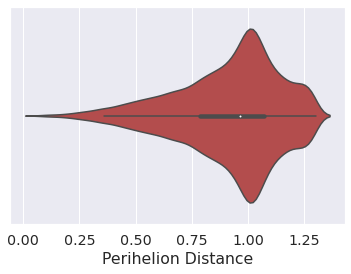

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


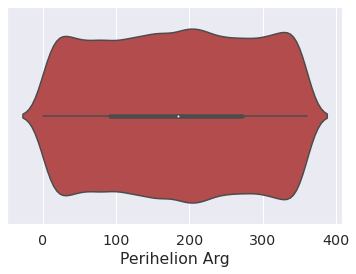

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


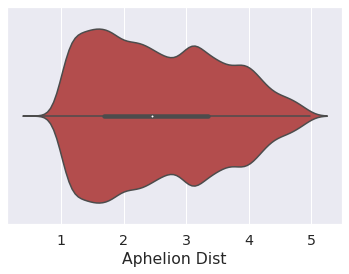

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


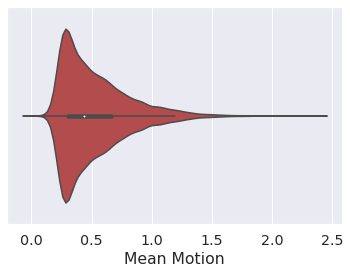

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


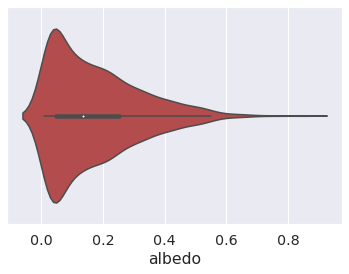

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


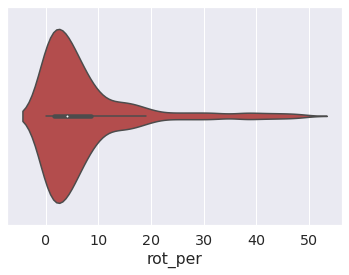

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


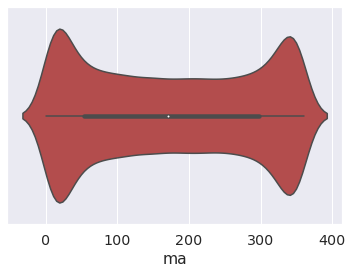

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


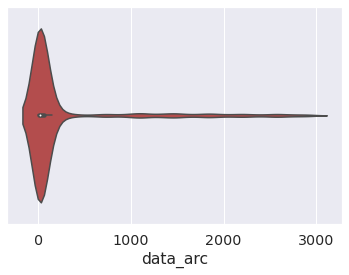

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


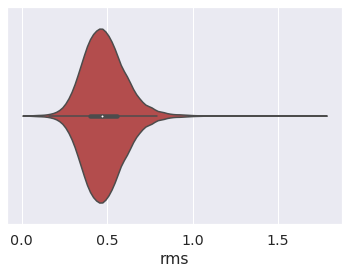

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


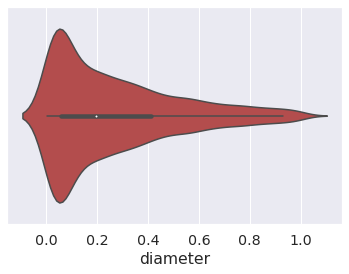

In [ ]:
sns.set(font_scale=1.3)
for col in cont_cols:
    series = df[col].dropna()
    if col in ['Orbital Period', 'rot_per', 'data_arc', 'diameter', 'data_arc', 'Aphelion Dist']:
        # columns with a few large outliers
        m = np.mean(series)
        s = np.std(series)
        series = series.where(series < m + 0.5*s)
    sns.violinplot(series, color='red', saturation=0.4)
    plt.show()

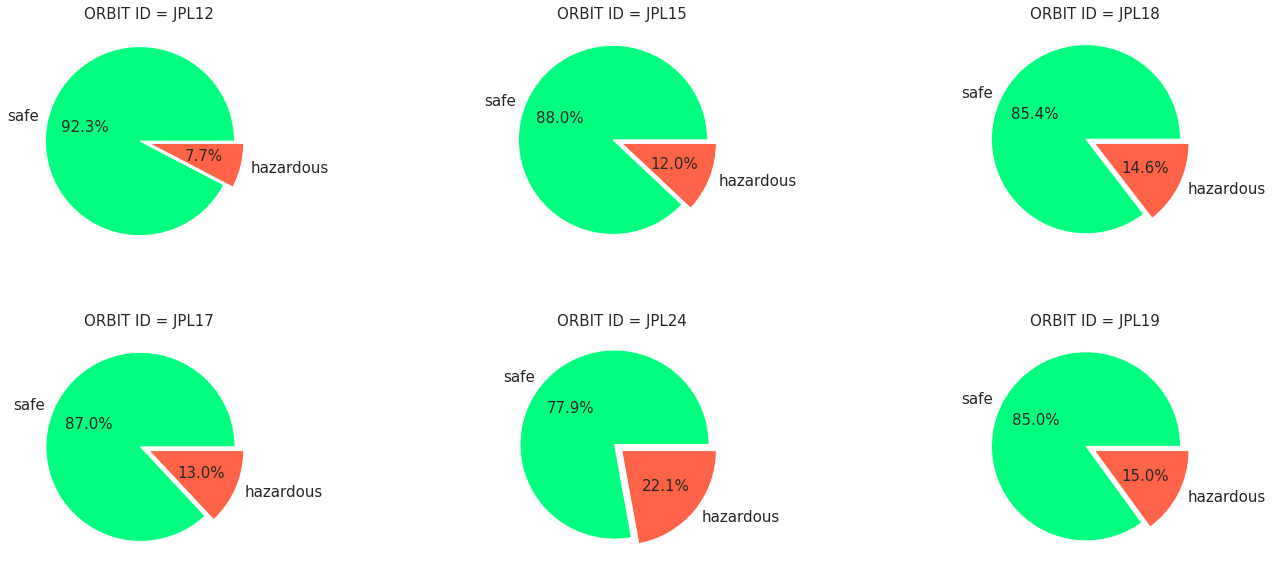

In [ ]:
temp_2 = df[["orbit_id","pha"]].groupby("orbit_id").sum()
temp_2 = temp_2.sort_values(by="pha",ascending=False)
index = temp_2.index[:6]
fig,ax  =plt.subplots(2,3,figsize=(24,10))
fig.subplots_adjust(hspace=0.3)
for i,id in enumerate(index):
  df_id = df.loc[df["orbit_id"]==id]
  df_id = df_id[['orbit_id','pha']].groupby("pha").count()
  ax[i//3][i%3].pie(x = df_id["orbit_id"], labels = ["safe","hazardous"], colors=["springgreen","tomato"],explode=(0.1,0),autopct='%1.1f%%',textprops={'fontsize': 15})
  ax[i//3][i%3].set_title("ORBIT ID = JPL"+str(id),size = 15)

plt.show()

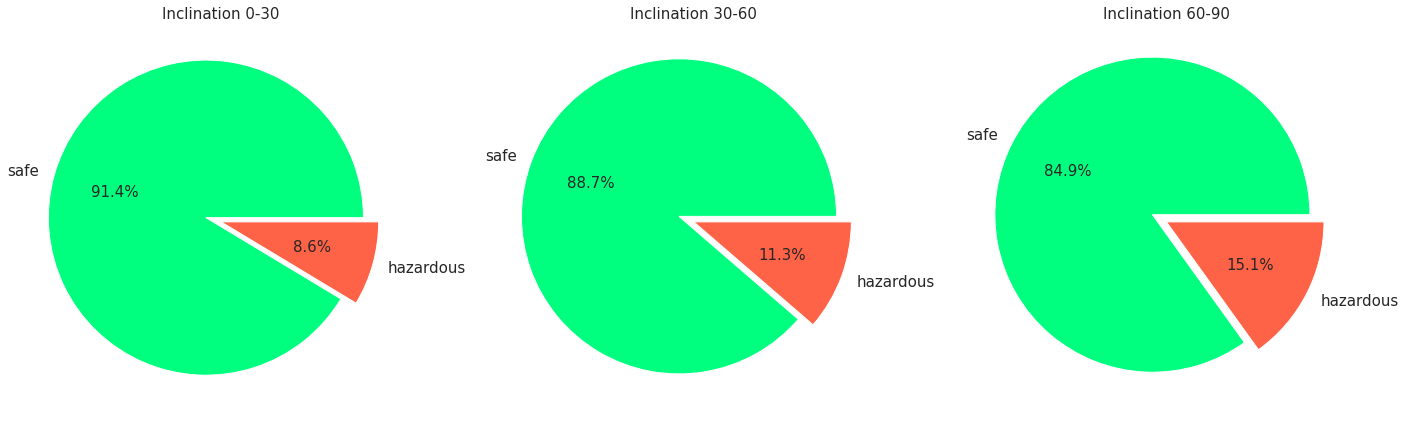

In [ ]:
inc_groups = df['Inclination']//30
inc_groups = inc_groups.replace({0:'0-30', 1:'30-60', 2:'60-90', 3:'90-120', 4:'120-150', 5:'150+'})
dfk = df
dfk["Inc"] = inc_groups
fig,ax  = plt.subplots(1,3,figsize=(18,10))
fig.subplots_adjust(hspace=0.3)
for i,inc in enumerate(dfk["Inc"].unique()[:3]):
  df_id = dfk.loc[dfk["Inc"]==inc]
  df_id = df_id[['Inc','pha']].groupby("pha").count()
  ax[i%3].pie(x = df_id["Inc"], labels = ["safe","hazardous"], colors=["springgreen","tomato"],explode=(0.1,0),autopct='%1.1f%%',textprops={'fontsize': 15})
  ax[i%3].set_title("Inclination "+str(inc),size = 15)

plt.show()

#### Q-Q plots

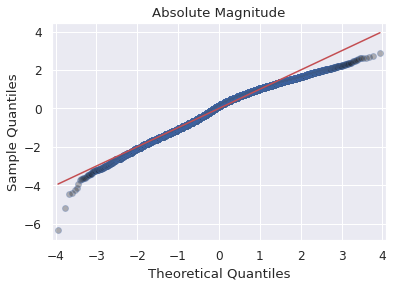

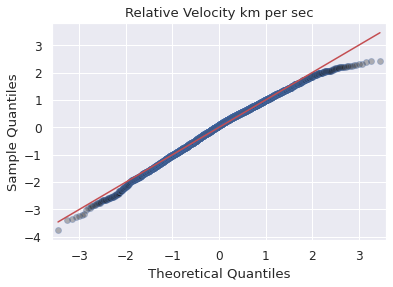

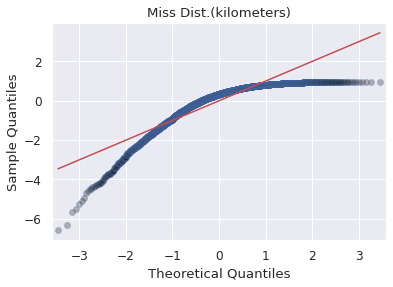

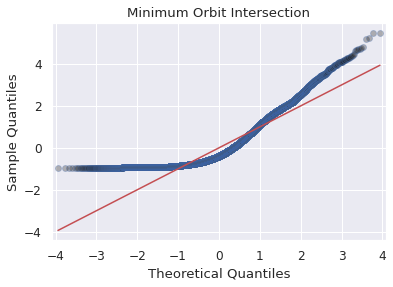

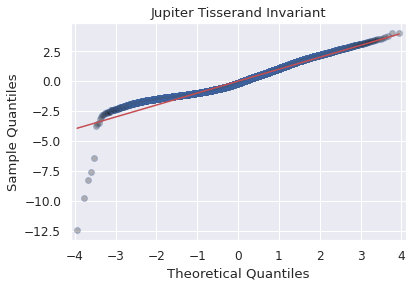

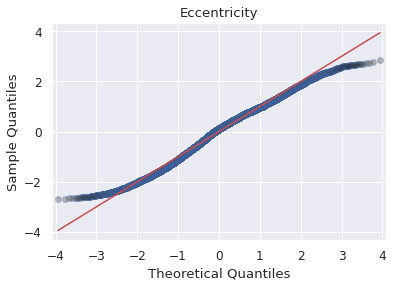

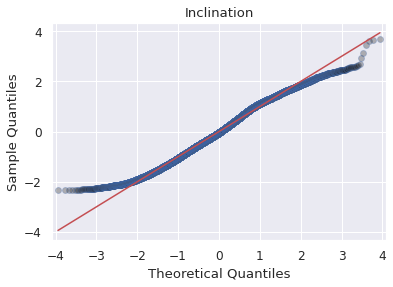

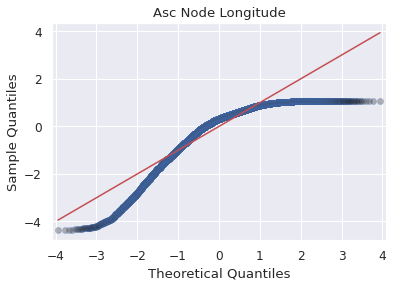

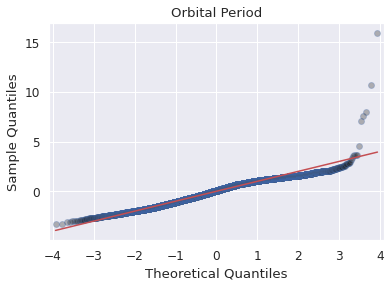

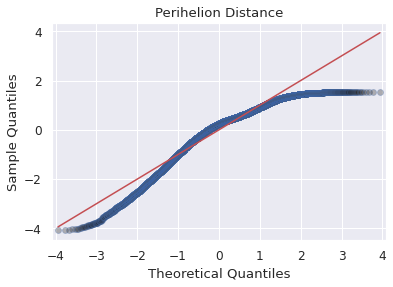

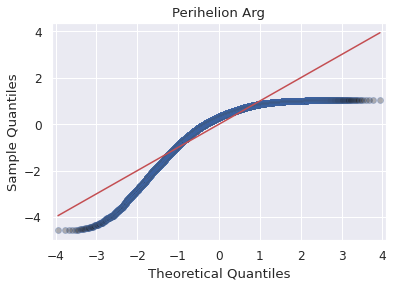

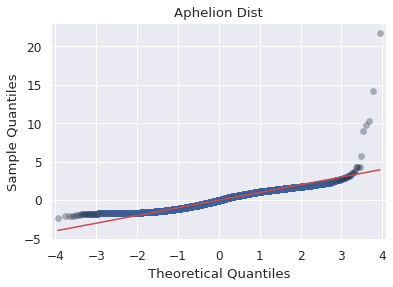

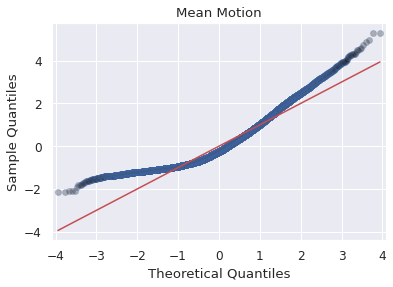

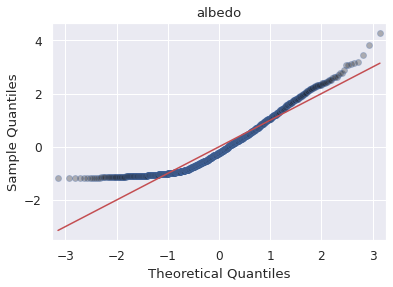

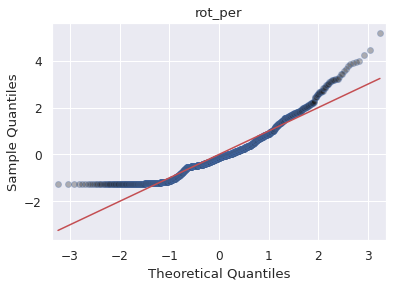

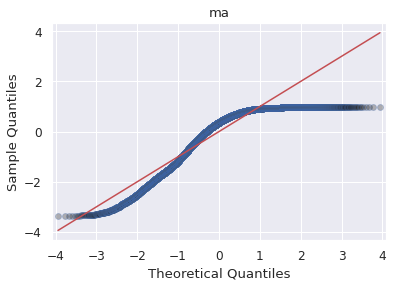

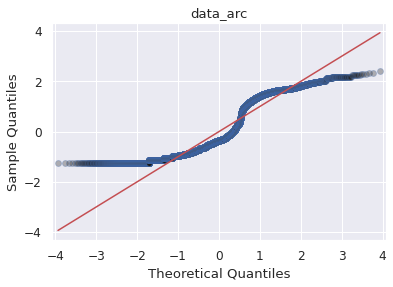

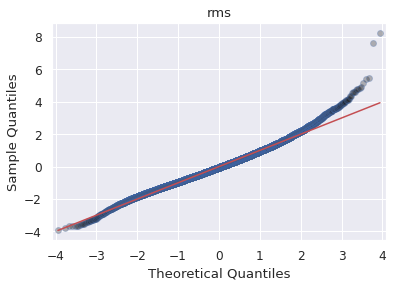

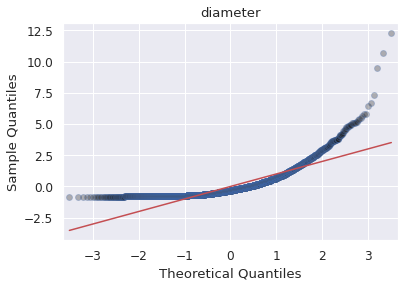

In [ ]:
for col in cont_cols:
    pp = sm.ProbPlot(np.log(df[col].dropna()+2), fit=True)
    fig = pp.qqplot( markerfacecolor='k',alpha = 0.3,line = "s")        #drawing qq plots for the log of the distribution----
                                              # added a dc offset not sure if we require it
    plt.title(col)
    plt.show()

#### Scatter Plots

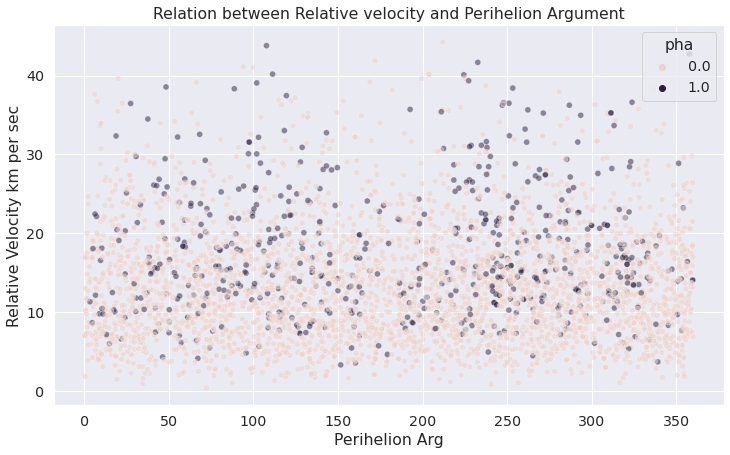

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Perihelion Arg", y="Relative Velocity km per sec",
                alpha=0.5, hue="pha", data=df)
plt.title('Relation between Relative velocity and Perihelion Argument')
plt.show()

# TODO: Find a better color maybe

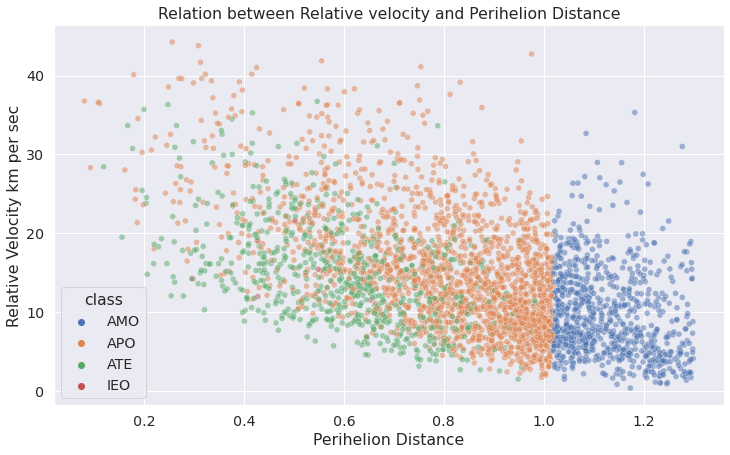

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Perihelion Distance", y="Relative Velocity km per sec",
                alpha=0.5, hue="class", data=df)
plt.title('Relation between Relative velocity and Perihelion Distance')
plt.show()

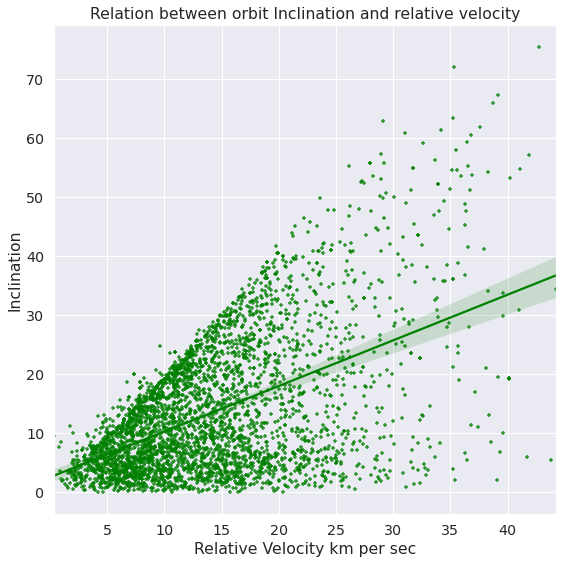

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Relation between orbit Inclination and relative velocity')
sns.regplot(x='Relative Velocity km per sec', y='Inclination', data=df, ci=99.99,
            color='green', marker="+", scatter_kws={"s": 20})
plt.show()

#### Frequency Plots

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


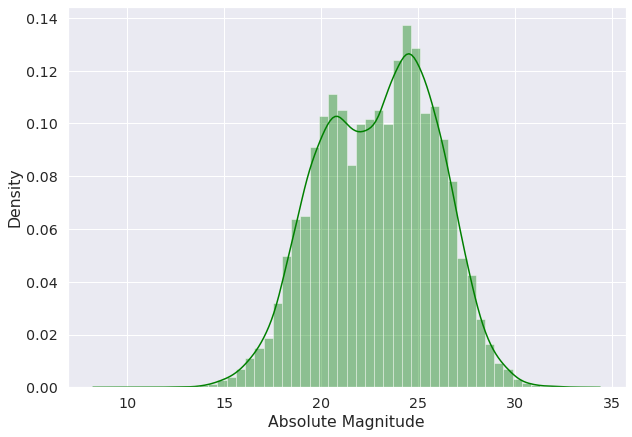

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


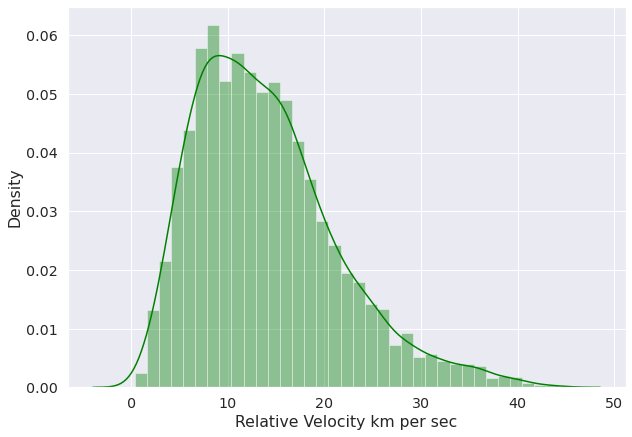

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


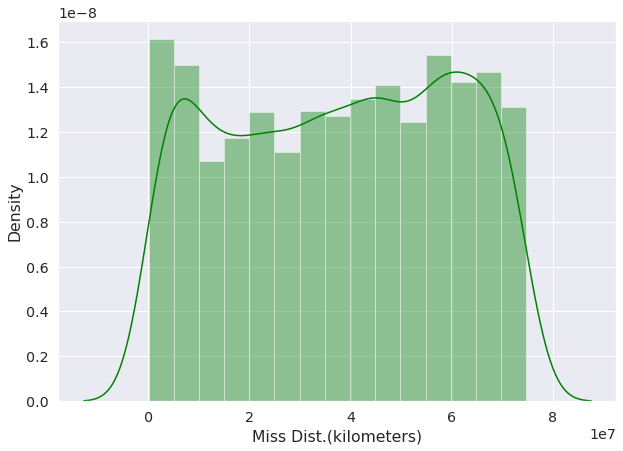

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


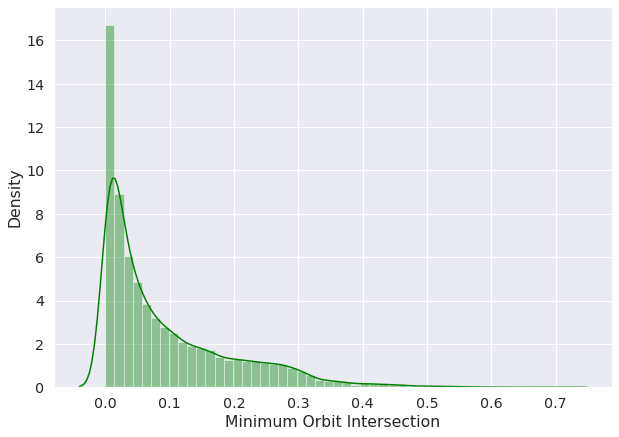

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


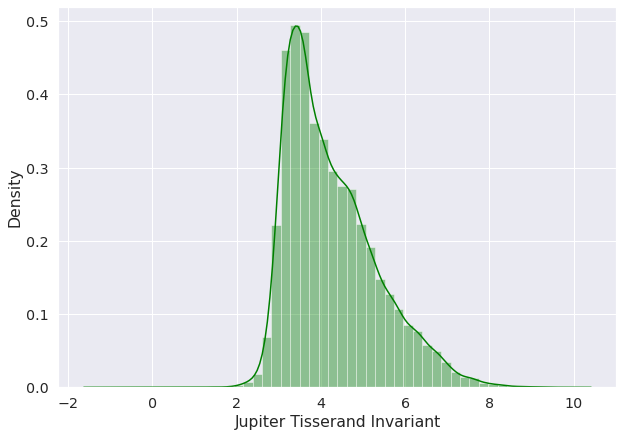

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


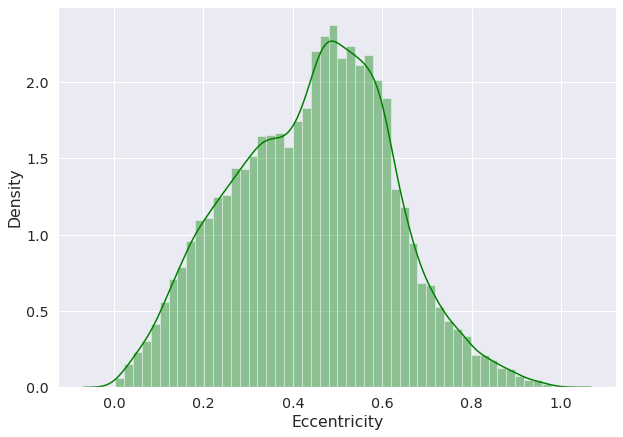

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


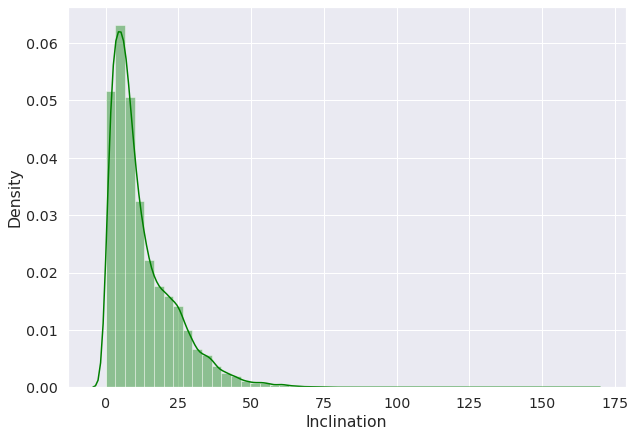

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


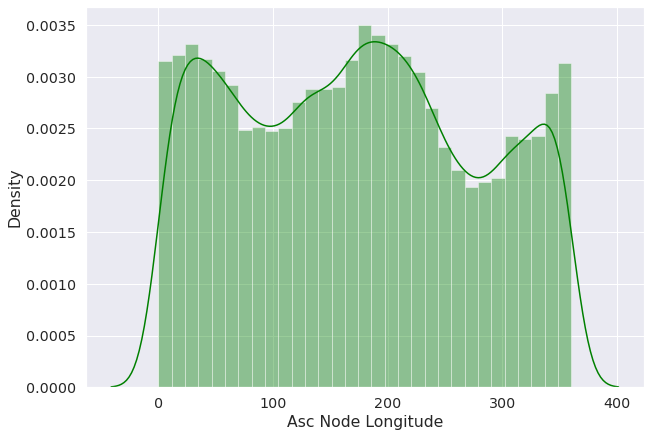

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


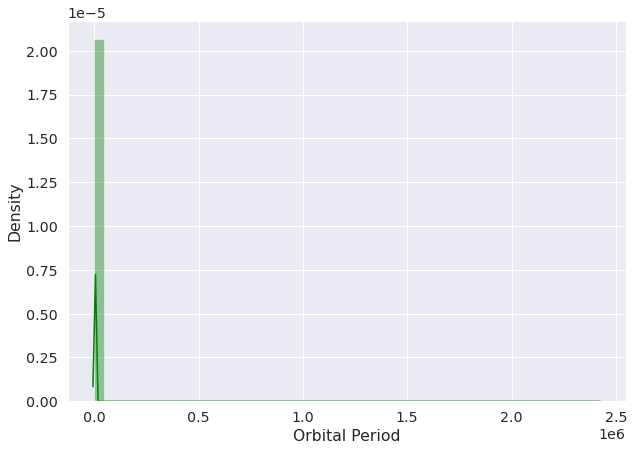

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


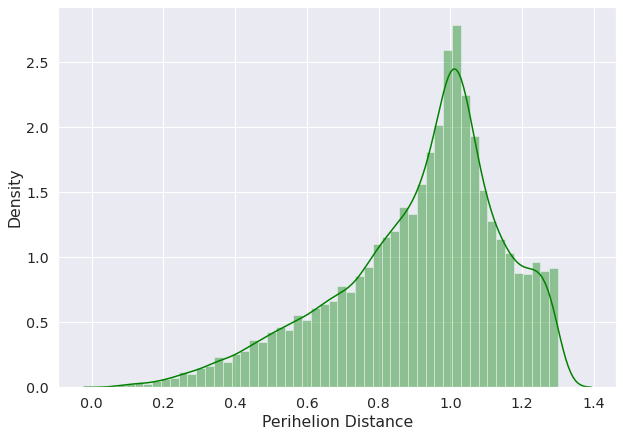

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


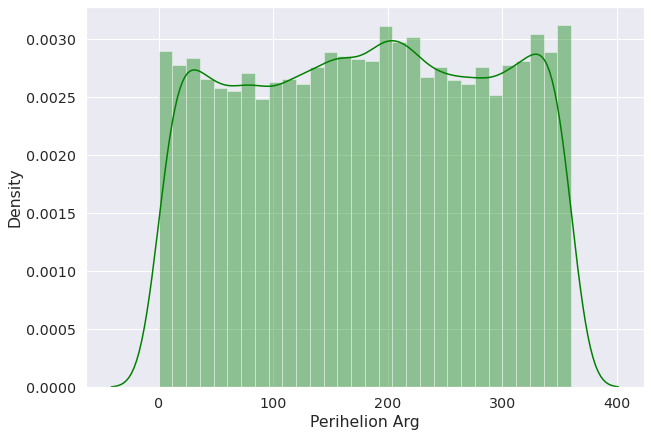

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


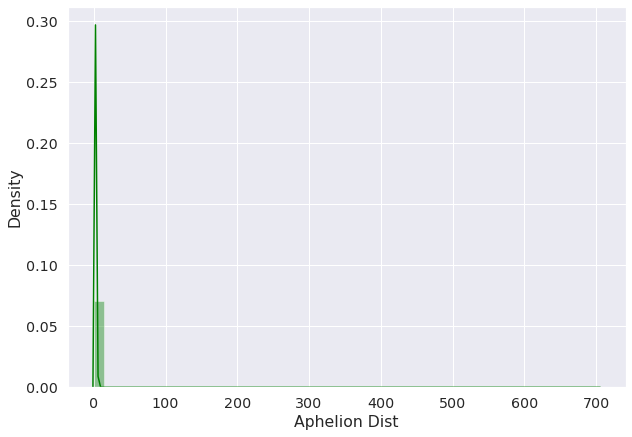

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


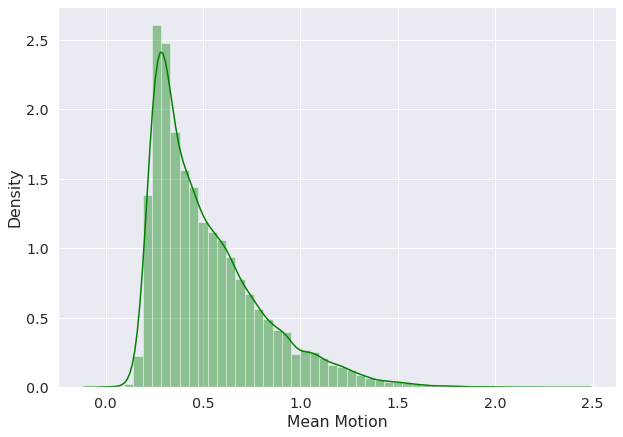

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


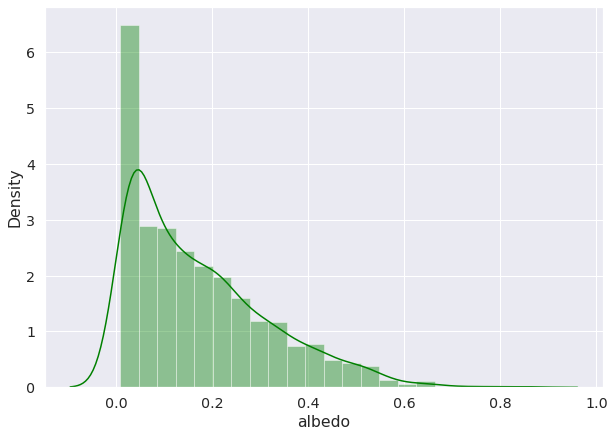

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


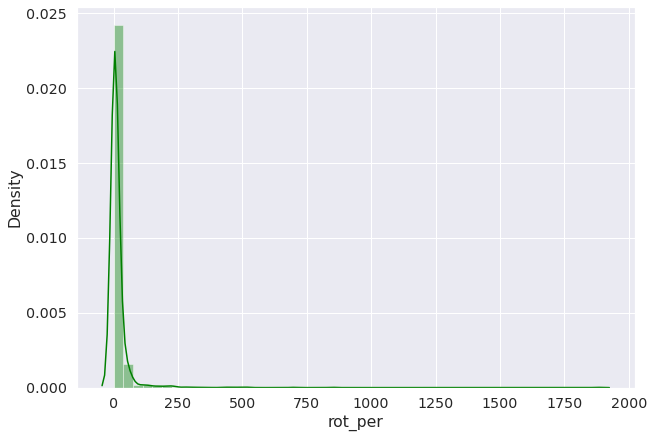

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


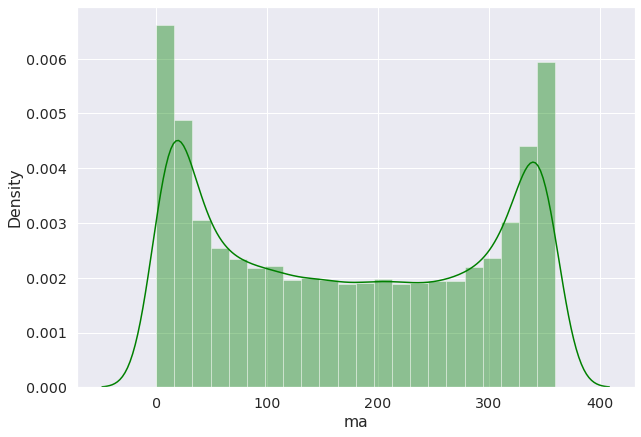

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


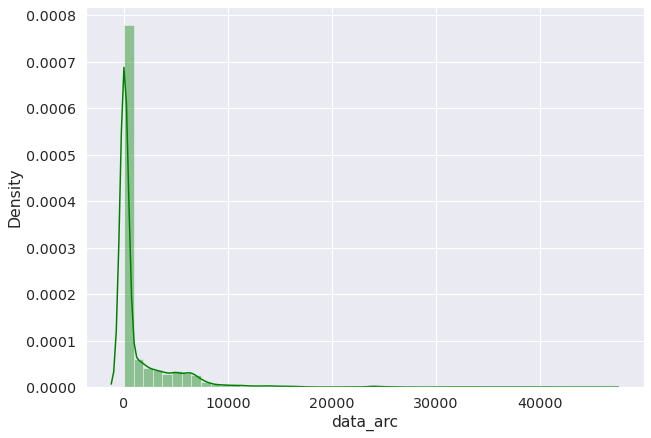

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


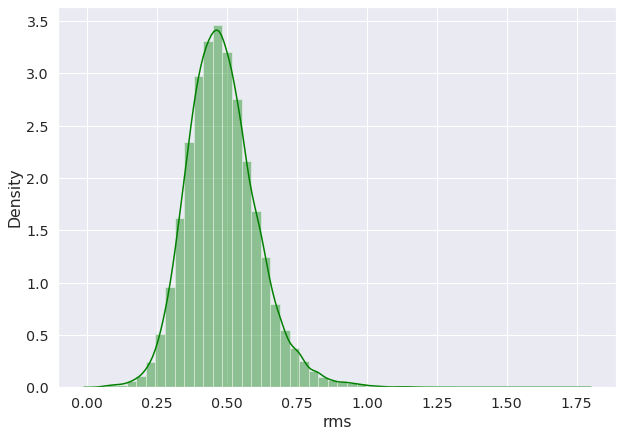

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


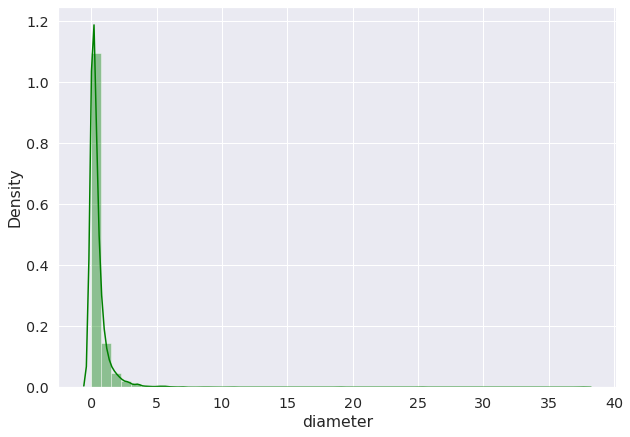

In [ ]:
for col in cont_cols:
    plt.figure(figsize=(10,7))
    sns.distplot(df[col], color='green')
    plt.show()

#### Multi-regression Plot

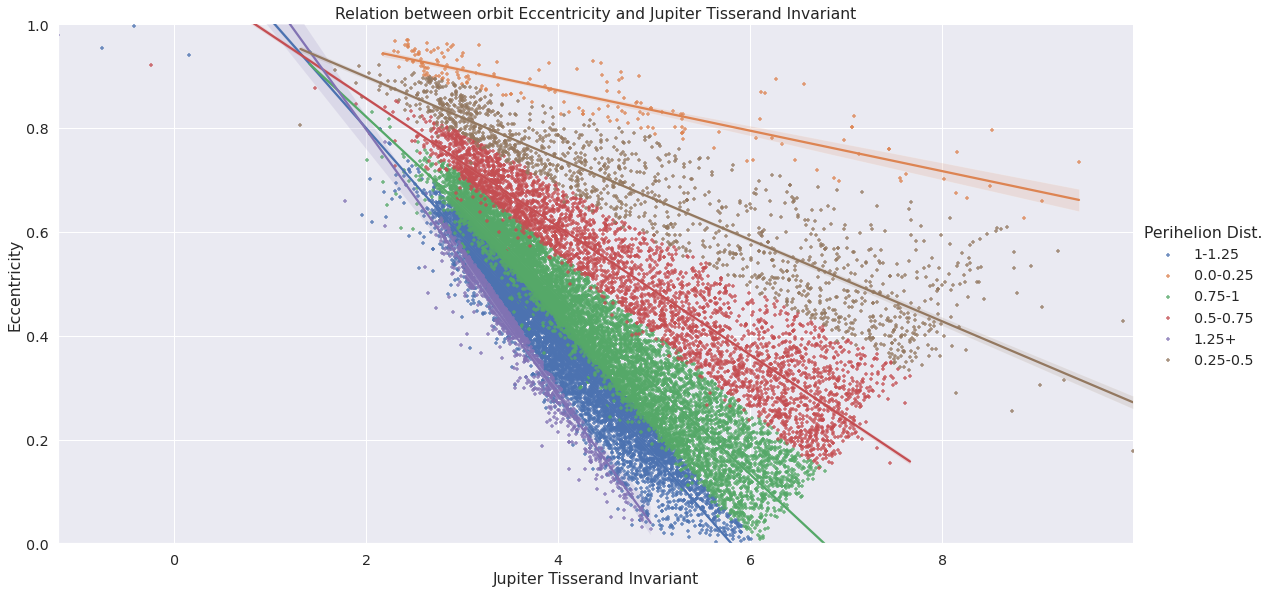

In [ ]:
sns.lmplot(data=temp,x="Jupiter Tisserand Invariant", y="Eccentricity", hue="Perihelion Dist.",
           height=8,markers="+", scatter_kws={"s": 10}, aspect=2)
plt.title('Relation between orbit Eccentricity and Jupiter Tisserand Invariant')
plt.ylim([0, 1])
plt.show()